# Classifying 2D Data with a Two-Layer Neural Network

 This notebook provides you with a complete code example that loads the data in the `data_class_2d_convex_clean.csv` file, trains a two-layer neural network to classify it, and finally uses it to classify the test data in the `data_class_2d_convex_clean_test.csv` file. 

## Loading and Plotting the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_class_2d_complex.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 1.12492178e+00  1.42336227e+00]
 [-4.77072451e-01  1.97906503e+00]
 [ 3.08448348e-01  6.73090390e-01]
 [-1.06006061e+00 -1.92952481e-01]
 [-1.64854684e+00  9.23699969e-01]
 [-1.34467265e+00 -1.16634646e+00]
 [-1.90893018e+00 -1.06721504e+00]
 [-7.00778796e-01  8.93604520e-01]
 [ 2.92320065e-01  1.28740311e+00]
 [ 5.28697645e-01  1.35495849e-01]
 [-5.43005232e-01 -1.11721917e+00]
 [ 1.38300320e+00  8.71946459e-01]
 [ 5.40414560e-01 -5.00487433e-01]
 [ 2.42404451e-01 -1.88973092e+00]
 [-7.01676130e-01  1.11387965e-01]
 [ 3.87366945e-02 -4.48163094e-01]
 [-2.28727839e-01  9.21698644e-01]
 [-5.30805474e-01 -2.50307748e-01]
 [ 1.05837398e+00 -1.92324177e+00]
 [-1.82727426e-01 -1.10064893e+00]
 [ 2.70557904e+00  7.66999246e-02]
 [ 2.14777505e+00 -3.95262666e-01]
 [ 3.99922900e-01 -1.67397925e+00]
 [-2.46631551e-01 -1.76302766e-01]
 [-1.67862928e+00  1.42461245e-01]
 [ 2.99794745e-03  1.85342705e-03]
 [ 2.85634598e+00  3.58944604e-01]
 [ 3.90416175e-01 -3.59344008e-01]
 [-5.44204791e-01

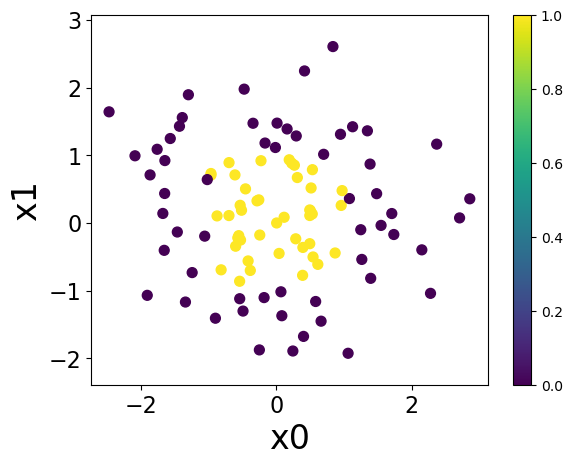

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt, fig_name="fig_01_17.pdf")  ### plot_data_2d(x, y_gt)

## Implementing a Dense Neural Network

Implement the sigmoidal activation function ...

In [3]:
from numpy import exp

def sigmoid(x):
    """Sigmoid function."""
    return 1 / (1 + exp(-x))

... implement a function to define the neural network ...

In [4]:
def dnn2_clas(wa, wb, x):
    """Two-layer dense neural network for classification.""" 
    x_a = x  # Input layer 1.
    p_a = x_a @ wa  # Activation potential layer 1.
    y_a = sigmoid(p_a)  # Output layer 1.
    
    x_b = y_a  # Input layer 2.
    p_b = x_b @ wb  # Activation potential layer 2.
    y_b = sigmoid(p_b)  # Output layer 2 (output neuron).
    
    return y_b

... define the number of neurons in the first layer ...

In [5]:
num_neurons = 10

... randomly initialize its weights ...

In [6]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons))  # Input weights layer 1.
wb = rng.standard_normal(size=(num_neurons, 1))  # Input weights layer 2.

... obtain its predictions for the input data ...

In [7]:
y_p = dnn2_clas(wa, wb, x)

... and plot its predictions.

In [8]:
from plotting import plot_pred_2d

### plot_pred_2d(x, y_gt, y_p=dnn2_clas(wa, wb, x), fig_name="fig_01_18a.pdf")  ### plot_pred_2d(x, y_gt, y_p=dnn2_clas(wa, wb, x))

## Implementing the Backpropagation Algorithm

Implement the first derivative of the sigmoid function ...

In [9]:
def d_sigmoid(x):
    """Derivative of sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

... implement the backpropagation algorithm ...

In [10]:
from numpy import reshape, transpose, sum

num_samples = len(x)
num_train_iterations = 10 ** 7
eta = .1  # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # Select random sample. 
    x_selected = reshape(x[selected], (1, -1))
    y_gt_selected = reshape(y_gt[selected], (1, -1))
    
    # Detailed neural network calculation.
    x_selected_a = x_selected  # Input layer 1.
    p_a = x_selected_a @ wa  # Activation potential layer 1. 
    y_selected_a = sigmoid(p_a)  # Output layer 1.
    
    x_selected_b = y_selected_a   # Input layer 2.
    p_b = x_selected_b @ wb  # Activation potential layer 2.
    y_selected_b = sigmoid(p_b)  # Output layer 2 (output neuron).
    
    y_p_selected = y_selected_b
    
    # Update weights.    
    error = y_p_selected - y_gt_selected  # Calculate error.
    
    delta_b = error * d_sigmoid(p_b)
    wb -= eta * delta_b * transpose(x_selected_b)
    
    delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
    wa -= eta * delta_a * transpose(x_selected_a)

    if i%100 == 0:
        print(f"{i} y_p={y_p_selected[0, 0]:.2f} error = {error[0, 0]:.2f}")

0 y_p=0.34 error = -0.66
100 y_p=0.76 error = 0.76
200 y_p=0.47 error = -0.53
300 y_p=0.36 error = 0.36
400 y_p=0.54 error = 0.54
500 y_p=0.43 error = -0.57
600 y_p=0.55 error = 0.55
700 y_p=0.34 error = 0.34
800 y_p=0.44 error = 0.44
900 y_p=0.49 error = 0.49
1000 y_p=0.42 error = -0.58
1100 y_p=0.41 error = 0.41
1200 y_p=0.38 error = -0.62
1300 y_p=0.50 error = 0.50
1400 y_p=0.55 error = 0.55
1500 y_p=0.50 error = -0.50
1600 y_p=0.41 error = -0.59
1700 y_p=0.48 error = 0.48
1800 y_p=0.40 error = 0.40
1900 y_p=0.39 error = -0.61
2000 y_p=0.44 error = -0.56
2100 y_p=0.35 error = 0.35
2200 y_p=0.37 error = 0.37
2300 y_p=0.48 error = 0.48
2400 y_p=0.48 error = 0.48
2500 y_p=0.36 error = -0.64
2600 y_p=0.52 error = 0.52
2700 y_p=0.35 error = -0.65
2800 y_p=0.39 error = -0.61
2900 y_p=0.50 error = -0.50
3000 y_p=0.34 error = 0.34
3100 y_p=0.42 error = 0.42
3200 y_p=0.49 error = 0.49
3300 y_p=0.47 error = 0.47
3400 y_p=0.46 error = 0.46
3500 y_p=0.33 error = 0.33
3600 y_p=0.32 error = 0.32


... and plot its predictions.

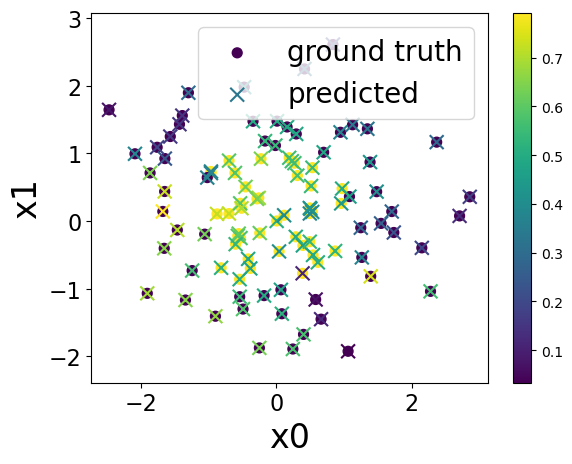

In [11]:
plot_pred_2d(x, y_gt, y_p=dnn2_clas(wa, wb, x), fig_name="fig_01_18a.pdf")  ### plot_pred_2d(x, y_gt, y_p=dnn2_clas(wa, wb, x))

## Testing the Performance of the Trained Neural Network

Check how the trained neuron works on the test data.

In [12]:
### (x_test, y_gt_test) = load_data(filename="data_class_2d_convex_clean_test.csv")

### plot_pred_2d(x_test, y_gt_test, y_p=dnn2_clas(wa, wb, x_test))